In [1]:
import warnings; warnings.simplefilter('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

%matplotlib inline

## Linear Regression on boston dataset

In [3]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

boston = load_boston()
X = boston.data
y = boston.target

# print first M points
M = 10
df = pd.DataFrame(X[:M,:], columns=["X{}".format(i) for i in range(X.shape[1])])
df["y"] = y[:M]
display(df)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [4]:
# split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
N_train, D_train = X_train.shape
N_test, D_test = X_test.shape

# normalize data
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train-mean)/std
X_test = (X_test-mean)/std

mean_y = y_train.mean()
std_y = y_train.std()
y_train = (y_train-mean_y)/std_y
y_test = (y_test-mean_y)/std_y

print("N_train, D_train: ", (N_train, D_train))
print("N_test, D_test: ", (N_test, D_test))


# print first M training points
M = 10
df = pd.DataFrame(X_train[:M,:], columns=["X{}".format(i) for i in range(X.shape[1])])
df["y"] = y_train[:M]
display(df)

N_train, D_train:  (404, 13)
N_test, D_test:  (102, 13)


,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,y
0,-0.388224,1.076259,-0.722902,-0.251312,-1.003852,-0.371632,-1.578918,1.357410,-0.966392,-0.596305,-0.718194,0.027784,-0.651743,-0.368788
1,-0.379151,-0.487399,0.408367,3.979112,-0.019147,0.107134,0.859130,-0.223933,-0.495010,-0.764961,-0.948472,0.389881,-0.277524,0.023349
2,-0.372791,0.071050,-0.461395,-0.251312,-0.247535,-0.409429,0.629791,1.333960,-0.495010,-0.554141,-1.501140,0.309044,0.647510,-0.423252
3,0.678313,-0.487399,1.016623,-0.251312,1.649845,-0.937191,0.912054,-0.969925,1.744056,1.584177,0.801641,0.426217,1.457617,-1.087706
4,-0.249477,-0.487399,-0.422386,-0.251312,-0.124557,-1.016985,1.060242,-0.014239,-0.612855,-0.578234,1.170086,0.192447,1.196925,-1.000565
5,-0.385991,-0.487399,-1.013305,-0.251312,-0.370514,0.025940,0.188755,-0.246031,-0.495010,-0.644492,-0.856361,0.411268,-0.867584,0.197632
6,-0.388090,3.086676,-1.111550,-0.251312,-1.354340,-0.009058,-1.772974,1.343321,-0.612855,-0.397532,-1.086639,0.426217,-1.094638,0.077813
7,-0.346347,-0.487399,-0.168103,-0.251312,-0.071852,0.119733,-0.029999,-0.142294,-0.612855,-0.596305,-0.027360,0.406784,-0.297146,0.034242
8,-0.206518,-0.487399,1.564198,-0.251312,0.630881,-1.788329,1.127280,-1.152213,-0.612855,0.204812,1.262198,0.426217,3.073624,-0.913423
9,-0.385739,-0.487399,0.255220,-0.251312,-1.011758,-0.090252,-0.506318,0.572577,-0.495010,-0.030102,0.110807,0.305480,-0.019636,-0.172719



Linear regression:
MSE: 0.31167038572032024
R2: 0.6862152885564244

SVM:
MSE: 0.20841938150152386
R2: 0.7901667322913692


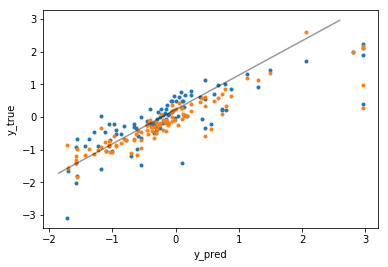

In [5]:
# train linear model 
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
plt.plot(y_test, y_pred, ".")
print("\nLinear regression:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

# train non-linear model (svm)
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
plt.plot(y_test, y_pred, ".")
print("\nSVM:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

# plot y_train/y_pred line
x_min, x_max = np.min(y_pred), np.max(y_pred)
y_min, y_max = np.min(y_test), np.max(y_test)
plt.plot((x_min, x_max), (y_min, y_max), "black", alpha=0.4)
plt.xlabel("y_pred")
plt.ylabel("y_true");

## Logistic Regression on breast_cancer dataset

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
N_train, D_train = X_train.shape
N_test, D_test = X_test.shape

#normalize data
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train-mean)/std
X_test = (X_test-mean)/std

print("N_train, D_train: ", (N_train, D_train))
print("N_test, D_test: ", (N_test, D_test))


# train linear model 
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict_proba(X_test)[:,1]
print("\nLogistic regression:")
print("AUC:", roc_auc_score(y_test, y_pred))

# train non-linear model (svm)
svr = SVC(probability=True)
svr.fit(X_train, y_train)
y_pred = svr.predict_proba(X_test)[:,1]
print("\nSVM:")
print("AUC:", roc_auc_score(y_test, y_pred))

N_train, D_train:  (398, 30)
N_test, D_test:  (171, 30)

Logistic regression:
AUC: 0.9994288977727014

SVM:
AUC: 0.9985722444317533
